In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [208]:
# reading csv file
df = pd.read_csv('medical_examination.csv')

In [209]:
# Checking headers and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [210]:
# Looking at examples of data fields
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<font color='#9999ff'> **Task: We need to create a chart similar to this:**</font>  

where we show the counts of good and bad outcomes for the 'cholesterol', 'gluc', 'alco', 'active', and 'smoke' variables for patients with 'cardio=1' and 'cardio=0' in different panels. We will first complete other sub tasks

Example chart
<div>
<img src="Example%20pictures/Figure_1.png" width="900" height="400"/>
</div>

<font color='#9999ff'> **Task: Add an overweight column to the data and determine if person is overweight**</font>  

Computing BMI

We calculate their BMI by dividing their weight in kilograms by the square of their height in meters.  

Since the height is given in cm, we have to first covert it to m. Then we divide weight (kg) by height squared.

In [211]:
height_squared = (df['height'] / 100) ** 2

bmi_values = df['weight'] / height_squared

If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [212]:
# create a list to populate values
bmi = []

# loop through the tuple and add 0s or 1s to bmi list accordingly
for row, bmi_val in bmi_values.items():
  if bmi_val > 25:
    bmi.append(1)
  else:
    bmi.append(0)

Assign new bmi list as a series to 'overweight' column in df

In [213]:
df['overweight'] = pd.Series(bmi)

<font color='#9999ff'>**Task: Normalize the data by making 0 always good and 1 always bad.  
If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.**
</font>  

Checking min & max values for both variables

In [214]:
df[['cholesterol', 'gluc']].describe().loc[['min','max']]

,cholesterol,gluc
min,1.0,1.0
max,3.0,3.0


We now create 2 new lists to hold new normalised values. Then loop through each row and append values accordingly.

In [215]:
cholesterol_new, gluc_new = [], []

# loop through the dataframe and add 0s or 1s to new lists accordingly
for index, data in df[['cholesterol', 'gluc']].iterrows():
  cholesterol_new.append(0) if data['cholesterol'] == 1 else cholesterol_new.append(1)
  gluc_new.append(0) if data['gluc'] == 1 else gluc_new.append(1)

Assign new list for cholesterol and gluc as a series to dataframe

In [216]:
df['cholesterol'] = pd.Series(cholesterol_new)
df['gluc'] = pd.Series(gluc_new)

<font color='#9999ff'> **Task:**  
**1. Convert the data into long format.**  
**2. Create a chart that shows the value counts of the categorical features using seaborn's catplot().  
The dataset should be split by 'Cardio' so there is one chart for each cardio value.**
</font>

Getting data for the plot

In [217]:
data1 = df[['cardio', 'active', 'alco', 'cholesterol', 'gluc','overweight', 'smoke']]

Converting data to long format  

Youtube tutorial:
https://www.youtube.com/watch?v=ezf2Slns0Bo

In [218]:
plot1_data = data1.melt(id_vars='cardio')
plot1_data.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


C:\Users\hong\AppData\Local\Temp\ipykernel_3644\646706057.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.figure.show()


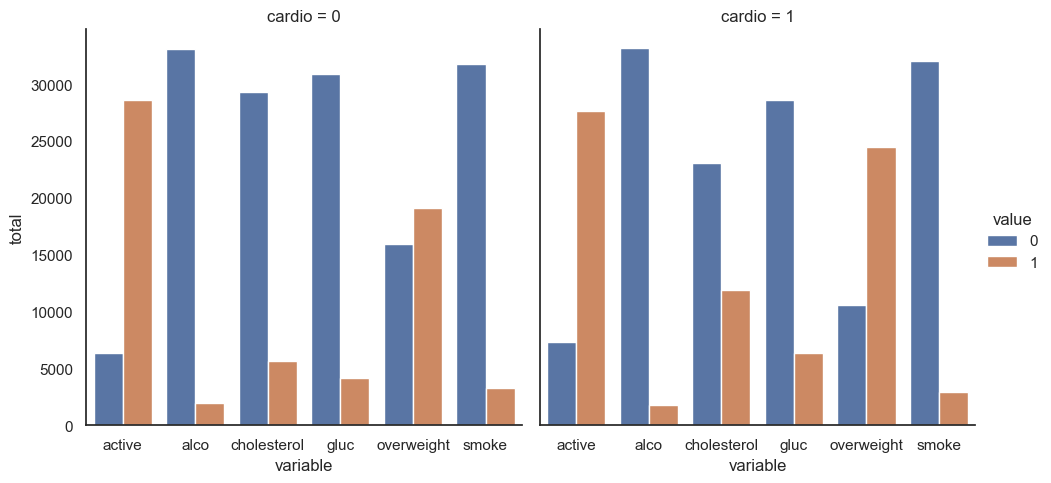

In [248]:
# set seaborn plot aesthetics
sns.set(style='white')

# plot catplot. Note: hue' param splits by value (0 and 1), 'col' param splits into different chart (cardio 0/1 in this case)
# plt1 is actually a SNS FacetGrid object
plt1 = sns.catplot(data=plot1_data, kind='count', x='variable', y=None, hue='value', col='cardio', errorbar=None)

# set axis labels
plt1.set_axis_labels(x_var='variable', y_var='total')

# This gives us the figure by accessing the Matplotlib obj underneath
plt1.figure.show()

<font color='#9999ff'> **Task: Clean the data of incorrect data.**

**Filter out if:**
  <ul>
  <li>diastolic pressure is higher than systolic.</li>
  <li>height is less than the 2.5th percentile.</li>
  <li>height is more than the 97.5th percentile.</li>
  <li>weight is less than the 2.5th percentilee</li>
  <li>weight is more than the 97.5th percentile.</li>
</ul>
</font>

We do a conditional check, then select the id of rows we want to discard.

In [220]:
# Select rows to discard if diastolic pressure is MORE THAN systolic.
to_discard1 = df[df['ap_lo'] > df['ap_hi']]['id']

# Select rows to discard if height is (LOWER THAN 2.5th percentile) or (MORE THAN 97.5th percentile).
to_discard2 = df[ (df['height'] < df['height'].quantile(0.025)) | (df['height'] > df['height'].quantile(0.975)) ]['id']

# Select rows to discard if weight is (LOWER THAN 2.5th percentile) or (MORE THAN 97.5th percentile)
to_discard3  = df[ (df['weight'] < df['weight'].quantile(0.025)) | (df['weight'] > df['weight'].quantile(0.975)) ]['id']

We concatenate the dataframes to be discarded and also remove duplicates

In [221]:
# Concat the dfs to discard
id_set_to_discard = pd.concat([to_discard1, to_discard2, to_discard3])

# Drop duplicate rows
id_set_to_discard.drop_duplicates(inplace=True)

Print checks

In [222]:
print(len(df))
print(len(id_set_to_discard))
print(len(df)-len(id_set_to_discard))

70000
6741
63259


Now we create another dataframe. This will store values of those that are not discarded.

In [223]:
# Create a new dataframe. Select the rows if the id does not appear set of ids to discard
new_df = df[~(df['id'].isin(id_set_to_discard))]

# check
new_df.shape

(63259, 14)

<font color='#9999ff'> **Task: Create a correlation matrix using the dataset.**
<ul>
  <li>Plot the correlation matrix using seaborn's 'heatmap()'</li>
  <li>Mask the upper triangle. The chart should look like</li>
</ul>

</font>

Example chart
<div>
<img src="Example%20pictures/Figure_2.png" height="600" width=auto>
</div>

We generate a correlation matrix for all features using '.corr()'. We round all values to 2dp

In [224]:
corr_matrix = round(new_df.corr(), 4)

Displaying first few rows to check output

In [225]:
corr_matrix.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0000,0.0025,0.0034,0.0003,0.0001,0.0035,0.0005,0.0037,0.0023,-0.0027,-0.0007,0.0059,0.0039,-0.0007
age,0.0025,1.0000,-0.0181,-0.0769,0.0702,0.0187,0.1535,0.1300,0.0870,-0.0444,-0.0270,-0.0114,0.2402,0.0896
sex,0.0034,-0.0181,1.0000,0.5058,0.1300,0.0051,0.0599,-0.0376,-0.0214,0.3374,0.1686,0.0079,0.0023,-0.0529
height,0.0003,-0.0769,0.5058,1.0000,0.2515,0.0046,0.0179,-0.0635,-0.0305,0.1878,0.0898,-0.0057,-0.0241,-0.1496
weight,0.0001,0.0702,0.1300,0.2515,1.0000,0.0270,0.2279,0.1360,0.1071,0.0565,0.0599,-0.0144,0.1700,0.6559


Creating a mask for the upper triangle as we only want values below the diagonal

In [226]:
mask = np.triu(np.ones_like(corr_matrix))

Creating a basic seaborn heatmap.  

Parameters:
<ul>
  <li>'cmap' to change colour</li>
  <li>'annot' to display correlation values</li>
  <li>'mask' to mask out cells that are marked as True</li>
  <li>'cbar_kws' to change the colour bar properties</li>
<ul>

Setting up matplotlib figure and plotting heatmap with seaborn

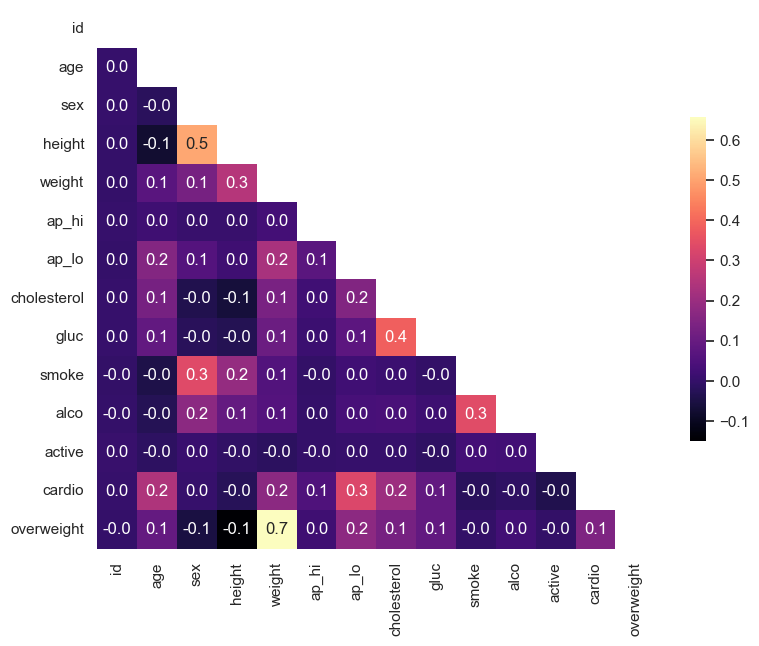

In [250]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, cmap='magma', annot=True, fmt=".1f", mask=mask, cbar_kws={"shrink": .6})
plt.show()